In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Value:
  """ stores a single scalar value and its gradient. """

  def __init__(self, data, _children = (), _op = "", label = ""): # Here _children is an empty tuple and _op is an empty string
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
    self.grad = 0.0

  def __repr__(self):
    return f"Value(data = {self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), "+")
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), "*")
    return out

  def tanh(self):
    x = self.data
    t =

# Example
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

print(a*b + c)
# What actually happens here is first __mul__ is called for a * b and then the result is added to c using __add__
print((a.__mul__(b)).__add__(c))
print(type(a))

Value(data = 4.0)
Value(data = 4.0)
<class '__main__.Value'>


In [ ]:
d = a*b +c
d

Value(data = 4.0)

In [ ]:
d._prev, d._op

({Value(data = -6.0), Value(data = 10.0)}, '+')

In [ ]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label="{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')

        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


In [ ]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'

L


Value(data = -8.0)

In [ ]:
# Manual derivative wrt to variable
# dL/dL = 1 we can also check in lol() function below
# dL/dd = f as L = d * f also we can check in lol() function below
# dL/df  = d similarly as above
# For dL/dc we will use chain rule of calculus i.e dL/dd *dd/dc and we know that dL/dd = f now dd/dc = 1 as d = e + c
# So dL/dc = f * 1 = f we can also check in the lol() function below.
# Similarly for dL/de = f * 1 = f
# For dL/da = dL/de * de/da and de/da = b

L.grad = 1.0
d.grad = -2.0
f.grad = 4.0
c.grad = -2.0
e.grad = -2.0
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

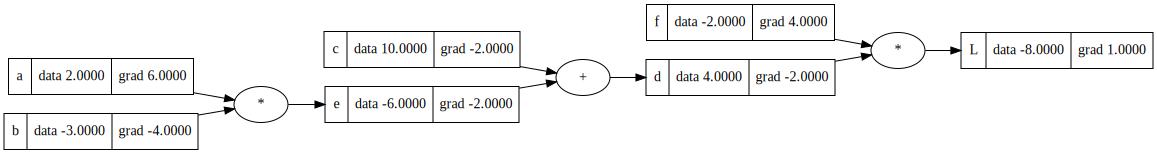

In [ ]:
draw_dot(L)

In [ ]:
def lol():
  # To check the derivative of L with respect to certain variable manually.
  # The reason that lol() function is created is inorder to make global scope unchanged and unpolluted as
  # the below variables are local to lol() function.
  # Checking for dL/db

  h = 0.0001 # A small increment

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')

  e = a * b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label='c')

  e = a * b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data

  derivative_wrt_var = (L2 - L1)/h
  print(derivative_wrt_var)

lol()

-4.000000000008441


# Optimizing with the help of gradients, i.e improving our Loss (L)

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
L = d * f; L.label = 'L'

L.grad = 1.0
d.grad = -2.0
e.grad = -2.0

L

Value(data = -7.286496)

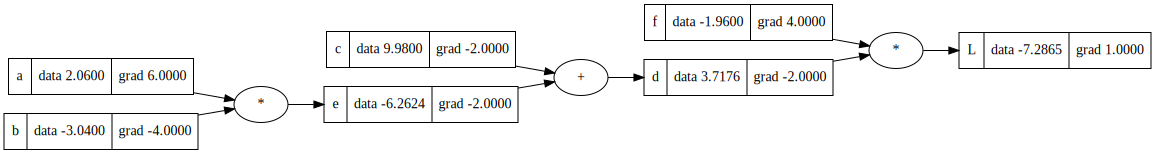

In [ ]:
draw_dot(L)